## ISLR Classification Lab

### 4.7.1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.naive_bayes import GaussianNB
# statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('D:\Columbia\课程\第一学期\machine learning\hw\data_export\Smarket.csv', index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 1 to 1250
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 97.7+ KB


In [4]:
df.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


C:\Users\LEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Day')

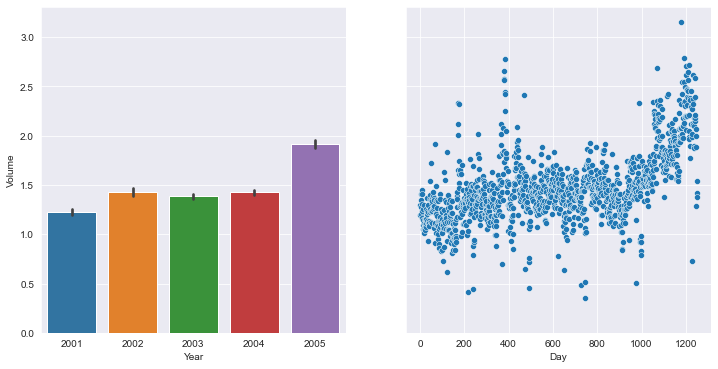

In [5]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,6))
sns.barplot(df.Year, df.Volume, ax=ax1)
sns.scatterplot(df.index, df.Volume, ax=ax2)
ax2.set_xlabel("Day")

### 4.7.2 logistic regression

In [6]:
formula = 'Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume'
smarket_glm = smf.glm(formula, data=df, family=sm.families.Binomial()).fit()
smarket_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1243
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -863.79
Date:                                  Mon, 18 Oct 2021   Deviance:                       1727.6
Time:                                          21:55:16   Pearson chi2:                 1.25e+03
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1260      0.241      0.523      0.601      -0.346       0.598
Lag1           0.0731      0.050      1.457      0.145      -0.025       0.171
Lag2           0.0423      0.050      0.845      0.398      -0.056       0.140
Lag3          -0.0111      0.050     -0.222      0.824      -0.109       0.087
Lag4          -0.0094      0.050     -0.187      0.851      -0.107       0.089
Lag5          -0.0103      0.050     -0.208      0.835      -0.107       0.087
Volume        -0.1354      0.158     -0.855      0.392      -0.446       0.175
==============================================================================
"""

In [7]:
features = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']
response = 'Direction'
X = df[features]
y = df[response]

logreg = LogisticRegression(penalty='none') 
logreg.fit(X, y)
coefs = pd.DataFrame(logreg.coef_, columns = features)
coefs.insert(loc=0, column="Intercept", value=logreg.intercept_)
coefs

,Intercept,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,-0.126008,-0.073073,-0.042301,0.011086,0.00936,0.010313,0.135446


In [8]:
display(logreg.predict_proba(X)[0:10, 1])
y_pred = logreg.predict(X)
display(y_pred[0:10])

array([0.50708369, 0.48146717, 0.48113874, 0.51522232, 0.51078106,
       0.50695658, 0.49265099, 0.5092293 , 0.51761327, 0.48883779])

array(['Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Down'],
      dtype=object)

In [9]:
df_confusion = pd.crosstab(y, y_pred)
df_confusion = pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
display(df_confusion)
print((df_confusion.at['Up', 'Up'] + df_confusion.at['Down', 'Down']) / df_confusion.at['All', 'All'])

Predicted,Down,Up,All
Actual,,,
Down,145,457,602
Up,141,507,648
All,286,964,1250


0.5216


In [10]:
df_train = df.loc[df.Year < 2005]
df_test = df.loc[df.Year == 2005]
print("Training dataset shape: ", df_train.shape)
print("Test dataset shape: ", df_test.shape)

Training dataset shape:  (998, 9)
Test dataset shape:  (252, 9)


In [11]:
# Create training data and fit the model to it
X = df_train[features]
y = df_train[response]

logreg = LogisticRegression(penalty='none') 
logreg.fit(X, y)

# Predict on test data
X_test = df_test[features]
y_test = df_test[response]
y_pred = logreg.predict(X_test)

# Evaluate accuracy
df_confusion = pd.crosstab(y_test, y_pred)
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
display(df_confusion)
print((df_confusion.at['Up', 'Up'] + df_confusion.at['Down', 'Down']) / df_confusion.at['All', 'All'])

Predicted,Down,Up,All
Actual,,,
Down,77,34,111
Up,97,44,141
All,174,78,252


0.4801587301587302


In [12]:
features = ['Lag1', 'Lag2']
# Create training data and fit the model to it
X = df_train[features]
y = df_train[response]

logreg = LogisticRegression(penalty='none') 
logreg.fit(X, y)

# Predict on test data
X_test = df_test[features]
y_test = df_test[response]
y_pred = logreg.predict(X_test)

# Evaluate accuracy
df_confusion = pd.crosstab(y_test, y_pred)
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
display(df_confusion)
print((df_confusion.at['Up', 'Up'] + df_confusion.at['Down', 'Down']) / df_confusion.at['All', 'All'])
print(df_confusion.at['Up', 'Up']  / df_confusion.at['All', 'Up'])

Predicted,Down,Up,All
Actual,,,
Down,35,76,111
Up,35,106,141
All,70,182,252


0.5595238095238095
0.5824175824175825


### 4.7.3 LDA

In [13]:
features = ['Lag1', 'Lag2']
response = 'Direction'

# Fit on training data
X = df_train[features]
y = df_train[response]
lda = LDA()
lda.fit(X, y)

# Priors, group means, and coefficients of linear discriminants
priors = pd.DataFrame(lda.priors_, index=lda.classes_).T
print("Prior probabilities of groups:")
display(priors)
gmeans = pd.DataFrame(lda.means_, index=lda.classes_, columns=features)
print("\nGroup means:")
display(gmeans)
coef = pd.DataFrame(lda.scalings_, columns=['LD1'], index=features)
print("\nCoefficients of linear discriminants:")
display(coef)

Prior probabilities of groups:


,Down,Up
0,0.491984,0.508016



Group means:


,Lag1,Lag2
Down,0.042790,0.033894
Up,-0.039546,-0.031325



Coefficients of linear discriminants:


,LD1
Lag1,-0.642019
Lag2,-0.513529


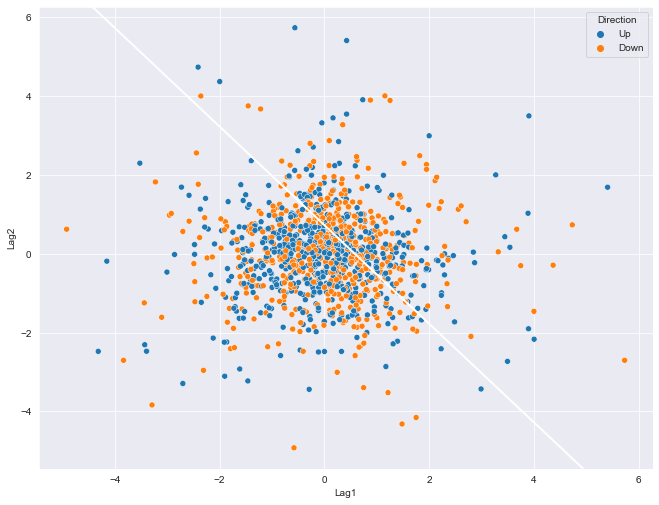

In [14]:
fig, ax = plt.subplots(figsize=(11, 8.5))
sns.scatterplot(data=df, x='Lag1', y='Lag2', ax=ax, hue='Direction')

# create a mesh of (x,y) values. Plot the values where P(Y=1|X)=0.5, which yields the decision boundary
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [15]:
X_test = df_test[features]
y_test = df_test[response]
y_pred = lda.predict(X_test)

# Generate posterior probability matrix
posterior = pd.DataFrame(lda.predict_proba(X_test), columns=lda.classes_)
# Generate linear discriminants on the test subset
discrim_test = lda.transform(X_test)

# Evaluate accuracy
df_confusion = pd.crosstab(y_test, y_pred)
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
display(df_confusion)
print((df_confusion.at['Up', 'Up'] + df_confusion.at['Down', 'Down']) / df_confusion.at['All', 'All'])

Predicted,Down,Up,All
Actual,,,
Down,35,76,111
Up,35,106,141
All,70,182,252


0.5595238095238095


In [16]:
# First 20 posterior probabilities
print('Posterior probabilities:')
print(posterior.iloc[:20])
# First 20 prediction results
print('\nFirst 20 prediction results: \n', y_pred[:20])
# Number of Down class with threshold changed to 0.9
print('\nNumber of Down class with threshold = 0.9: ', sum(posterior['Down'] > 0.9))

Posterior probabilities:
        Down        Up
0   0.490179  0.509821
1   0.479218  0.520782
2   0.466818  0.533182
3   0.474001  0.525999
4   0.492788  0.507212
5   0.493856  0.506144
6   0.495102  0.504898
7   0.487286  0.512714
8   0.490701  0.509299
9   0.484403  0.515597
10  0.490696  0.509304
11  0.511999  0.488001
12  0.489515  0.510485
13  0.470676  0.529324
14  0.474459  0.525541
15  0.479958  0.520042
16  0.493578  0.506422
17  0.503089  0.496911
18  0.497881  0.502119
19  0.488633  0.511367

First 20 prediction results: 
 ['Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Down' 'Up' 'Up'
 'Up' 'Up' 'Up' 'Down' 'Up' 'Up']

Number of Down class with threshold = 0.9:  0


### 4.7.4 QDA

In [17]:
features = ['Lag1', 'Lag2']
response = 'Direction'

# Fit on training data
X = df_train[features]
y = df_train[response]
qda = QDA()
qda.fit(X, y)


# Priors, group means, and coefficients of quadratic discriminants
priors = pd.DataFrame(qda.priors_, index=qda.classes_, columns=['']).T
print("Prior probabilities of groups:")
display(priors)
gmeans = pd.DataFrame(qda.means_, index=qda.classes_, columns=features)
print("\nGroup means:")
display(gmeans)

Prior probabilities of groups:


,Down,Up
,0.491984,0.508016



Group means:


,Lag1,Lag2
Down,0.042790,0.033894
Up,-0.039546,-0.031325


In [18]:
y_pred = qda.predict(X_test)

# Evaluate accuracy
df_confusion = pd.crosstab(y_test, y_pred)
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
display(df_confusion)
print((df_confusion.at['Up', 'Up'] + df_confusion.at['Down', 'Down']) / df_confusion.at['All', 'All'])

Predicted,Down,Up,All
Actual,,,
Down,30,81,111
Up,20,121,141
All,50,202,252


0.5992063492063492


4.7.5 Naive Bayes

In [20]:
gnb = GaussianNB()
gnb.fit(X, y)

y_pred=gnb.predict(X_test)

df_confusion_gnb = pd.crosstab(y_test, y_pred)
df_confusion_gnb = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
display(df_confusion)
print((df_confusion.at['Up', 'Up']) / df_confusion.at['All', 'All'])


Predicted,Down,Up,All
Actual,,,
Down,30,81,111
Up,20,121,141
All,50,202,252


0.4801587301587302


### 4.7.6 KNN

In [21]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X_test)

# Evaluate accuracy
df_confusion = pd.crosstab(y_test, y_pred)
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
display(df_confusion)
print((df_confusion.at['Up', 'Up'] + df_confusion.at['Down', 'Down']) / df_confusion.at['All', 'All'])

Predicted,Down,Up,All
Actual,,,
Down,43,68,111
Up,58,83,141
All,101,151,252


0.5


In [22]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
y_pred = knn.predict(X_test)

# Evaluate accuracy
df_confusion = pd.crosstab(y_test, y_pred)
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
display(df_confusion)
print((df_confusion.at['Up', 'Up'] + df_confusion.at['Down', 'Down']) / df_confusion.at['All', 'All'])

Predicted,Down,Up,All
Actual,,,
Down,48,63,111
Up,55,86,141
All,103,149,252


0.5317460317460317


### 4.7.6 Insurance Data

In [23]:
df = pd.read_csv("D:\Columbia\课程\第一学期\machine learning\hw\data_export\Caravan.csv", index_col=0)
df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
1,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
3,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
4,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
5,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [24]:
display(df.Purchase.describe())
len(df.Purchase.loc[df.Purchase == "Yes"]) / len(df.Purchase)

count     5822
unique       2
top         No
freq      5474
Name: Purchase, dtype: object

0.05977327378907592

In [25]:
np.random.seed(0)
X = scale(df.iloc[:,0:85].values, axis=0)

Y = np.array([1 if y=='Yes' else 0 for y in df.Purchase.values])
# split into train/test
num_points = 1000
X_test = X[0:1000]
y_test = Y[0:1000]
X_train = X[1000:]
y_train = Y[1000:]


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
display(np.mean(y_test != y_pred))
display(np.mean(y_test != 0))

0.118

0.059

In [26]:
# Evaluate accuracy
df_confusion = pd.crosstab(y_test, y_pred)
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
display(df_confusion)
print(df_confusion.at[1, 1] / df_confusion.at['All', 1])

Predicted,0,1,All
Actual,,,
0,873,68,941
1,50,9,59
All,923,77,1000


0.11688311688311688


### logistic regression

In [27]:
logreg = LogisticRegression() 
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Evaluate accuracy
df_confusion = pd.crosstab(y_test, y_pred)
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
display(df_confusion)
print(df_confusion.at[1, 1] / df_confusion.at['All', 1])

C:\Users\LEN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Predicted,0,1,All
Actual,,,
0,934,7,941
1,59,0,59
All,993,7,1000


0.0


In [28]:
posterior = logreg.predict_proba(X_test)
Yes_idx = np.where(logreg.classes_ == 1)[0][0]
y_pred = pd.Series(posterior[:, Yes_idx] > 0.25)
y_pred.replace([True, False], [1, 0], inplace=True)


df_confusion = pd.crosstab(y_test, y_pred)
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
display(df_confusion)
print(df_confusion.at[1, 1] / df_confusion.at['All', 1])

Predicted,0,1,All
Actual,,,
0,917,24,941
1,48,11,59
All,965,35,1000


0.3142857142857143


## 2 Classification Models for Stock Market Data

### (a) import data

In [29]:
df_weekly=pd.read_csv('D:\Columbia\课程\第一学期\machine learning\hw\data_export\Weekly.csv')

In [30]:
df_weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


In [31]:
df_weekly.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


<p>
    According to the correlation figure, volume and year has strong relationship, while today's return has week correlation with lags.
    <\p>

C:\Users\LEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'week')

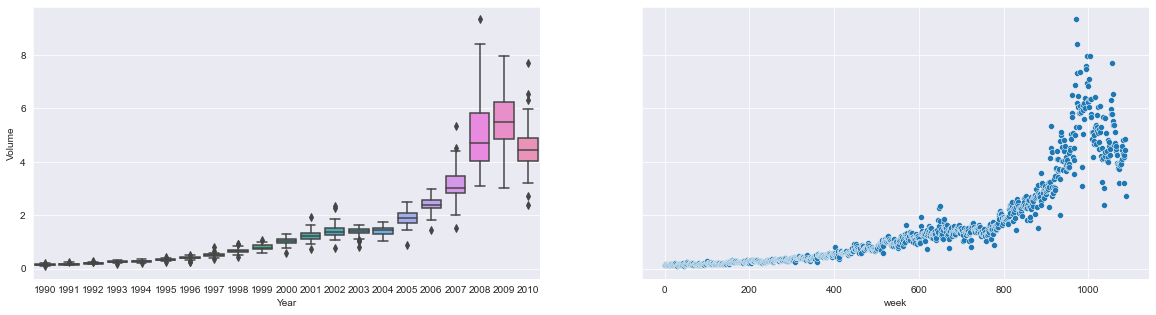

In [32]:
fig,(ax1,ax2)=plt.subplots(ncols=2,sharey=True,figsize=(20,5))
sns.boxplot(df_weekly.Year, df_weekly.Volume,ax=ax1)
sns.scatterplot(df_weekly.index, df_weekly.Volume,ax=ax2)
ax2.set_xlabel('week')


<p>The graph shows that the volume keep increases untill 2009. Then the volume decrease significently.</p>

### (b) logistic regression

In [33]:
formula="Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume"
weekly_glm=smf.glm(formula,data=df_weekly,family=sm.families.Binomial()).fit()
weekly_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1089
Model:                                              GLM   Df Residuals:                     1082
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -743.18
Date:                                  Mon, 18 Oct 2021   Deviance:                       1486.4
Time:                                          21:56:27   Pearson chi2:                 1.09e+03
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2669      0.086     -3.106      0.002      -0.435      -0.098
Lag1           0.0413      0.026      1.563      0.118      -0.010       0.093
Lag2          -0.0584      0.027     -2.175      0.030      -0.111      -0.006
Lag3           0.0161      0.027      0.602      0.547      -0.036       0.068
Lag4           0.0278      0.026      1.050      0.294      -0.024       0.080
Lag5           0.0145      0.026      0.549      0.583      -0.037       0.066
Volume         0.0227      0.037      0.616      0.538      -0.050       0.095
==============================================================================
"""

<P>p-value of $Lag2=0.03<0.05$, thus, Lag2 is statistic significent at confidence level of 0.05.<\p>

In [34]:
features=['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']
response='Direction'
X=df_weekly[features]
y=df_weekly[response]

logreg=LogisticRegression(penalty='none')
logreg.fit(X,y)

coefs=pd.DataFrame(logreg.coef_,columns=features)
coefs.insert(loc=0, value=logreg.intercept_,column='Intercept')
coefs

,Intercept,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,0.266863,-0.041268,0.058442,-0.016062,-0.027789,-0.014474,-0.022741


### (c) confusion matrix

In [35]:
y_pre=logreg.predict(X)

In [36]:
df_confusion=pd.crosstab(y,y_pre,rownames=['Actural'],colnames=['predicted'],margins=True)
display(df_confusion)

predicted,Down,Up,All
Actural,,,
Down,54,430,484
Up,48,557,605
All,102,987,1089


In [37]:
print('correcct rate:',(df_confusion.at['Down','Down']+df_confusion.at['Up','Up'])/df_confusion.at['All','All'])
print('error rate:',(df_confusion.at['Down','Up']+df_confusion.at['Up','Down'])/df_confusion.at['All','All'])
print('False positive:',df_confusion.at['Down','Up']/df_confusion.at['Down','All'])
print('False negative:',df_confusion.at['Up','Down']/df_confusion.at['Up','All'])
print('Precision:',df_confusion.at['Up','Up']/df_confusion.at['All','Up'])

correcct rate: 0.5610651974288338
error rate: 0.4389348025711662
False positive: 0.8884297520661157
False negative: 0.07933884297520662
Precision: 0.5643363728470111


<p>error rate means the rate of predictions that are differenct from actural response amone all predictions<br>False positive means that the rate of prediction that is up but actual response is Down.<br>False negative means the rate of prediction that is Down but actual response is Up.<br> Precision means the percentage of actual Up among predicted Up.

### (d)LR with Lags2

In [38]:
list_2=[]

In [39]:
df_train=df_weekly[df_weekly.Year<=2008]
df_test=df_weekly[df_weekly.Year>2008]

In [40]:
X_train=df_train[['Lag2']]
y_train=df_train['Direction']
X_test=df_test[['Lag2']]
y_test=df_test['Direction']
logreg2=LogisticRegression(penalty='none')
logreg2.fit(X_train,y_train)
coefs2=pd.DataFrame(logreg2.coef_,columns=['Lag2'])
coefs2.insert(loc=0,value=logreg2.intercept_,column='Intercept')
coefs2

,Intercept,Lag2
0,0.203257,0.058095


In [41]:
y_pre=logreg2.predict(X_test)
df_confusion2=pd.crosstab(y_test, y_pre, rownames=['Actural'],colnames=['Predicted'],margins=True)
display(df_confusion2)
print('correcct rate:',(df_confusion2.at['Down','Down']+df_confusion2.at['Up','Up'])/df_confusion2.at['All','All'])
print('error rate:',(df_confusion2.at['Down','Up']+df_confusion2.at['Up','Down'])/df_confusion2.at['All','All'])
print('False positive:',df_confusion2.at['Down','Up']/df_confusion2.at['Down','All'])
print('False negative:',df_confusion2.at['Up','Down']/df_confusion2.at['Up','All'])
print('Precision:',df_confusion2.at['Up','Up']/df_confusion2.at['All','Up'])
list_2.append((df_confusion2.at['Down','Down']+df_confusion2.at['Up','Up'])/df_confusion2.at['All','All'])

Predicted,Down,Up,All
Actural,,,
Down,9,34,43
Up,5,56,61
All,14,90,104


correcct rate: 0.625
error rate: 0.375
False positive: 0.7906976744186046
False negative: 0.08196721311475409
Precision: 0.6222222222222222


<p>the error rate is 0.375 which is less than previous LR. While, the False positive is still very high.<\p>

### (e) LDA

In [42]:
features = [ 'Lag2']
response = 'Direction'

# Fit on training data
X_train = df_train[features]
y_train = df_train[response]
lda = LDA()
lda.fit(X_train, y_train)

# Priors, group means, and coefficients of linear discriminants
priors = pd.DataFrame(lda.priors_, index=lda.classes_).T
print("Prior probabilities of groups:")
display(priors)
gmeans = pd.DataFrame(lda.means_, index=lda.classes_, columns=features)
print("\nGroup means:")
display(gmeans)
coef = pd.DataFrame(lda.scalings_, columns=['LD1'], index=features)
print("\nCoefficients of linear discriminants:")
display(coef)

Prior probabilities of groups:


,Down,Up
0,0.447716,0.552284



Group means:


,Lag2
Down,-0.035683
Up,0.260366



Coefficients of linear discriminants:


,LD1
Lag2,0.441416


In [43]:
X_test = df_test[features]
y_test = df_test[response]
y_pred = lda.predict(X_test)

# Generate posterior probability matrix
posterior = pd.DataFrame(lda.predict_proba(X_test), columns=lda.classes_)
# Generate linear discriminants on the test subset
discrim_test = lda.transform(X_test)

# Evaluate accuracy
df_confusion_lda = pd.crosstab(y_test, y_pred)
df_confusion_lda = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
display(df_confusion_lda)
print((df_confusion_lda.at['Up', 'Up'] + df_confusion_lda.at['Down','Down']) / df_confusion_lda.at['All', 'All'])
list_2.append((df_confusion_lda.at['Down','Down']+df_confusion_lda.at['Up','Up'])/df_confusion_lda.at['All','All'])

Predicted,Down,Up,All
Actual,,,
Down,9,34,43
Up,5,56,61
All,14,90,104


0.625


### (f) QDA

In [44]:
features = ['Lag2']
response = 'Direction'

# Fit on training data
X_train = df_train[features]
y_train = df_train[response]
qda = QDA()
qda.fit(X_train, y_train)


# Priors, group means, and coefficients of quadratic discriminants
priors = pd.DataFrame(qda.priors_, index=qda.classes_, columns=['']).T
print("Prior probabilities of groups:")
display(priors)
gmeans = pd.DataFrame(qda.means_, index=qda.classes_, columns=features)
print("\nGroup means:")
display(gmeans)


Prior probabilities of groups:


,Down,Up
,0.447716,0.552284



Group means:


,Lag2
Down,-0.035683
Up,0.260366


In [45]:
X_test=df_test[features]
y_test=df_test[response]
y_pred=qda.predict(X_test)

df_confusion_qda=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
print('QDA confusion matrix:')
display(df_confusion_qda)
print((df_confusion_qda.at['Up','Up'])/df_confusion_qda.at['All','All'])  
list_2.append(df_confusion_qda.at['Up','Up']/df_confusion_qda.at['All','All'])

QDA confusion matrix:


Predicted,Up,All
Actural,,
Down,43,43
Up,61,61
All,104,104


0.5865384615384616


### (g) KNN

In [46]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Evaluate accuracy
df_confusion_KNN = pd.crosstab(y_test, y_pred)
df_confusion_KNN = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print('KNN confusion matrix:')
display(df_confusion_KNN)
print((df_confusion_KNN.at['Up', 'Up'] + df_confusion_KNN.at['Down', 'Down']) / df_confusion_KNN.at['All', 'All'])


KNN confusion matrix:


Predicted,Down,Up,All
Actual,,,
Down,21,22,43
Up,30,31,61
All,51,53,104


0.5


In [47]:
correct_rate=0
n=0
for i in range(30):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    df_confusion=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
    rate=(df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All']
    if rate>correct_rate:
        correct_rate=rate
        n=i+1

knn=KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
df_confusion=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
print(f'knn-{n} with lag1 and lag2:')
display(df_confusion)
print('correct rate:',(df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])
list_2.append((df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])

knn-17 with lag1 and lag2:


Predicted,Down,Up,All
Actural,,,
Down,21,22,43
Up,20,41,61
All,41,63,104


correct rate: 0.5961538461538461


### (h) naive Bayes

In [48]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred=gnb.predict(X_test)

df_confusion_gnb = pd.crosstab(y_test, y_pred)
df_confusion_gnb = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print('Gaussian naive Gayes confusion matrix:')
display(df_confusion_gnb)
print((df_confusion_gnb.at['Up', 'Up']) / df_confusion_gnb.at['All', 'All'])
list_2.append(df_confusion_gnb.at['Up','Up']/df_confusion_gnb.at['All','All'])

Gaussian naive Gayes confusion matrix:


Predicted,Up,All
Actual,,
Down,43,43
Up,61,61
All,104,104


0.5865384615384616


### (i) comparation

<p>In concusion, Logistic regression and LDA appear to provide better result with $0.625$ correct rate.<\p>

### (j) different predictions

#### Lag1 and Lag2 

In [49]:
features=['Lag1','Lag2']
response='Direction'
X_train=df_weekly[df_weekly.Year<=2008][features]
y_train=df_weekly[df_weekly.Year<=2008][response]
X_test=df_weekly[df_weekly.Year>2008][features]
y_test=df_weekly[df_weekly.Year>2008][response]
list_12=[]

LR

In [50]:
logreg=LogisticRegression(penalty='none')
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

df_confusion=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
print('Logistic regression of lag1 and lag2 confusion matrix:')
display(df_confusion)
correct_rate=(df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All']
print('correct rate:',correct_rate)
list_12.append(correct_rate)

Logistic regression of lag1 and lag2 confusion matrix:


Predicted,Down,Up,All
Actural,,,
Down,7,36,43
Up,8,53,61
All,15,89,104


correct rate: 0.5769230769230769


LDA

In [51]:
lda=LDA()
lda.fit(X_train,y_train)
y_pred=lda.predict(X_test)

df_confusion=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
print('LDA with lag1 and lag2:')
display(df_confusion)
print('correct rate:',(df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])
list_12.append((df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])

LDA with lag1 and lag2:


Predicted,Down,Up,All
Actural,,,
Down,7,36,43
Up,8,53,61
All,15,89,104


correct rate: 0.5769230769230769


QDA

In [52]:
lda=QDA()
qda.fit(X_train,y_train)
y_pred=qda.predict(X_test)

df_confusion=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
print('QDA with lag1 and lag2:')
display(df_confusion)
print('correct rate:',(df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])
list_12.append((df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])

QDA with lag1 and lag2:


Predicted,Down,Up,All
Actural,,,
Down,7,36,43
Up,10,51,61
All,17,87,104


correct rate: 0.5576923076923077


KNN-k

In [53]:
correct_rate=0
n=0
for i in range(30):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    df_confusion=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
    rate=(df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All']
    if rate>correct_rate:
        correct_rate=rate
        n=i+1

knn=KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
df_confusion=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
print(f'knn-{n} with lag1 and lag2:')
display(df_confusion)
print('correct rate:',(df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])
list_12.append((df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])

knn-25 with lag1 and lag2:


Predicted,Down,Up,All
Actural,,,
Down,22,21,43
Up,18,43,61
All,40,64,104


correct rate: 0.625


naive Bayes

In [54]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred=gnb.predict(X_test)

df_confusion = pd.crosstab(y_test, y_pred)
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print('Gaussian naive Gayes confusion matrix:')
display(df_confusion)
print((df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])
list_12.append((df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])

Gaussian naive Gayes confusion matrix:


Predicted,Down,Up,All
Actual,,,
Down,3,40,43
Up,8,53,61
All,11,93,104


0.5384615384615384


In [55]:
list_12

[0.5769230769230769,
 0.5769230769230769,
 0.5576923076923077,
 0.625,
 0.5384615384615384]

#### Lag1 Lag2 Lag4

In [56]:
features=['Lag1','Lag2','Lag4']
response='Direction'
X_train=df_weekly[df_weekly.Year<=2008][features]
y_train=df_weekly[df_weekly.Year<=2008][response]
X_test=df_weekly[df_weekly.Year>2008][features]
y_test=df_weekly[df_weekly.Year>2008][response]
list_124=[]

LR

In [57]:
logreg=LogisticRegression(penalty='none')
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

df_confusion=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
print('Logistic regression of lag1 and lag2 confusion matrix:')
display(df_confusion)
correct_rate=(df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All']
print('correct rate:',correct_rate)
list_124.append(correct_rate)

Logistic regression of lag1 and lag2 confusion matrix:


Predicted,Down,Up,All
Actural,,,
Down,9,34,43
Up,7,54,61
All,16,88,104


correct rate: 0.6057692307692307


LDA

In [58]:
lda=LDA()
lda.fit(X_train,y_train)
y_pred=lda.predict(X_test)

df_confusion=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
print('LDA with lag1 and lag2:')
display(df_confusion)
print('correct rate:',(df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])
list_124.append((df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])

LDA with lag1 and lag2:


Predicted,Down,Up,All
Actural,,,
Down,9,34,43
Up,7,54,61
All,16,88,104


correct rate: 0.6057692307692307


QDA

In [59]:
lda=QDA()
qda.fit(X_train,y_train)
y_pred=qda.predict(X_test)

df_confusion=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
print('QDA with lag1 and lag2:')
display(df_confusion)
print('correct rate:',(df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])
list_124.append((df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])

QDA with lag1 and lag2:


Predicted,Down,Up,All
Actural,,,
Down,9,34,43
Up,20,41,61
All,29,75,104


correct rate: 0.4807692307692308


KNN-k

In [60]:
correct_rate=0
n=0
for i in range(30):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    df_confusion=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
    rate=(df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All']
    if rate>correct_rate:
        correct_rate=rate
        n=i+1

knn=KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
df_confusion=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
print(f'knn-{n} with lag1 and lag2:')
display(df_confusion)
print('correct rate:',(df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])
list_124.append((df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])

knn-5 with lag1 and lag2:


Predicted,Down,Up,All
Actural,,,
Down,19,24,43
Up,23,38,61
All,42,62,104


correct rate: 0.5480769230769231


naive Bayes

In [61]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred=gnb.predict(X_test)

df_confusion = pd.crosstab(y_test, y_pred)
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print('Gaussian naive Gayes confusion matrix:')
display(df_confusion)
print((df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])
list_124.append((df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])

Gaussian naive Gayes confusion matrix:


Predicted,Down,Up,All
Actual,,,
Down,8,35,43
Up,16,45,61
All,24,80,104


0.5096153846153846


In [62]:
list_124

[0.6057692307692307,
 0.6057692307692307,
 0.4807692307692308,
 0.5480769230769231,
 0.5096153846153846]

Lag2 Lag3

In [63]:
features=['Lag2','Lag3']
response='Direction'
X_train=df_weekly[df_weekly.Year<=2008][features]
y_train=df_weekly[df_weekly.Year<=2008][response]
X_test=df_weekly[df_weekly.Year>2008][features]
y_test=df_weekly[df_weekly.Year>2008][response]
list_23=[]

LR

In [64]:
logreg=LogisticRegression(penalty='none')
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

df_confusion=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
print('Logistic regression of lag1 and lag2 confusion matrix:')
display(df_confusion)
correct_rate=(df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All']
print('correct rate:',correct_rate)
list_23.append(correct_rate)

Logistic regression of lag1 and lag2 confusion matrix:


Predicted,Down,Up,All
Actural,,,
Down,8,35,43
Up,4,57,61
All,12,92,104


correct rate: 0.625


LDA

In [65]:
lda=LDA()
lda.fit(X_train,y_train)
y_pred=lda.predict(X_test)

df_confusion=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
print('LDA with lag1 and lag2:')
display(df_confusion)
print('correct rate:',(df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])
list_23.append((df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])

LDA with lag1 and lag2:


Predicted,Down,Up,All
Actural,,,
Down,8,35,43
Up,4,57,61
All,12,92,104


correct rate: 0.625


QDA

In [66]:
lda=QDA()
qda.fit(X_train,y_train)
y_pred=qda.predict(X_test)

df_confusion=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
print('QDA with lag1 and lag2:')
display(df_confusion)
print('correct rate:',(df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])
list_23.append((df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])

QDA with lag1 and lag2:


Predicted,Down,Up,All
Actural,,,
Down,4,39,43
Up,2,59,61
All,6,98,104


correct rate: 0.6057692307692307


KNN-K

In [67]:
correct_rate=0
n=0
for i in range(30):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    df_confusion=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
    rate=(df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All']
    if rate>correct_rate:
        correct_rate=rate
        n=i+1

knn=KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
df_confusion=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
print(f'knn-{n} with lag1 and lag2:')
display(df_confusion)
print('correct rate:',(df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])
list_23.append((df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])

knn-17 with lag1 and lag2:


Predicted,Down,Up,All
Actural,,,
Down,16,27,43
Up,16,45,61
All,32,72,104


correct rate: 0.5865384615384616


naive Bayes

In [68]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred=gnb.predict(X_test)

df_confusion = pd.crosstab(y_test, y_pred)
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print('Gaussian naive Gayes confusion matrix:')
display(df_confusion)
print(df_confusion.at['Up','Up']/df_confusion.at['All','All'])
list_23.append(df_confusion.at['Up','Up']/df_confusion.at['All','All'])

Gaussian naive Gayes confusion matrix:


Predicted,Up,All
Actual,,
Down,43,43
Up,61,61
All,104,104


0.5865384615384616


In [69]:
list_23

[0.625, 0.625, 0.6057692307692307, 0.5865384615384616, 0.5865384615384616]

Lag2 Lag4

In [70]:
features=['Lag2','Lag4']
response='Direction'
X_train=df_weekly[df_weekly.Year<=2008][features]
y_train=df_weekly[df_weekly.Year<=2008][response]
X_test=df_weekly[df_weekly.Year>2008][features]
y_test=df_weekly[df_weekly.Year>2008][response]
list_24=[]

LR

In [71]:
logreg=LogisticRegression(penalty='none')
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

df_confusion=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
print('Logistic regression of lag1 and lag2 confusion matrix:')
display(df_confusion)
correct_rate=(df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All']
print('correct rate:',correct_rate)
list_24.append(correct_rate)

Logistic regression of lag1 and lag2 confusion matrix:


Predicted,Down,Up,All
Actural,,,
Down,8,35,43
Up,4,57,61
All,12,92,104


correct rate: 0.625


LDA

In [72]:
lda=LDA()
lda.fit(X_train,y_train)
y_pred=lda.predict(X_test)

df_confusion=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
print('LDA with lag1 and lag2:')
display(df_confusion)
print('correct rate:',(df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])
list_24.append((df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])

LDA with lag1 and lag2:


Predicted,Down,Up,All
Actural,,,
Down,8,35,43
Up,4,57,61
All,12,92,104


correct rate: 0.625


QDA

In [73]:
lda=QDA()
qda.fit(X_train,y_train)
y_pred=qda.predict(X_test)

df_confusion=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
print('QDA with lag1 and lag2:')
display(df_confusion)
print('correct rate:',(df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])
list_24.append((df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])

QDA with lag1 and lag2:


Predicted,Down,Up,All
Actural,,,
Down,9,34,43
Up,14,47,61
All,23,81,104


correct rate: 0.5384615384615384


KNN-K

In [74]:
correct_rate=0
n=0
for i in range(30):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    df_confusion=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
    rate=(df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All']
    if rate>correct_rate:
        correct_rate=rate
        n=i+1

knn=KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
df_confusion=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
print(f'knn-{n} with lag1 and lag2:')
display(df_confusion)
print('correct rate:',(df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])
list_24.append((df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])

knn-2 with lag1 and lag2:


Predicted,Down,Up,All
Actural,,,
Down,34,9,43
Up,31,30,61
All,65,39,104


correct rate: 0.6153846153846154


naive Bayes

In [75]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred=gnb.predict(X_test)

df_confusion = pd.crosstab(y_test, y_pred)
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print('Gaussian naive Gayes confusion matrix:')
display(df_confusion)
print((df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])
list_24.append((df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])

Gaussian naive Gayes confusion matrix:


Predicted,Down,Up,All
Actual,,,
Down,7,36,43
Up,12,49,61
All,19,85,104


0.5384615384615384


In [76]:
list_24

[0.625, 0.625, 0.5384615384615384, 0.6153846153846154, 0.5384615384615384]

Lag1 Lag2 Lag3

In [77]:
features=['Lag1','Lag2','Lag3']
response='Direction'
X_train=df_weekly[df_weekly.Year<=2008][features]
y_train=df_weekly[df_weekly.Year<=2008][response]
X_test=df_weekly[df_weekly.Year>2008][features]
y_test=df_weekly[df_weekly.Year>2008][response]
list_123=[]

LR

In [78]:
logreg=LogisticRegression(penalty='none')
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

df_confusion=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
print('Logistic regression of lag1 and lag2 confusion matrix:')
display(df_confusion)
correct_rate=(df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All']
print('correct rate:',correct_rate)
list_123.append(correct_rate)

Logistic regression of lag1 and lag2 confusion matrix:


Predicted,Down,Up,All
Actural,,,
Down,8,35,43
Up,9,52,61
All,17,87,104


correct rate: 0.5769230769230769


LDA

In [79]:
lda=LDA()
lda.fit(X_train,y_train)
y_pred=lda.predict(X_test)

df_confusion=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
print('LDA with lag1 and lag2:')
display(df_confusion)
print('correct rate:',(df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])
list_123.append((df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])

LDA with lag1 and lag2:


Predicted,Down,Up,All
Actural,,,
Down,8,35,43
Up,9,52,61
All,17,87,104


correct rate: 0.5769230769230769


QDA

In [80]:
lda=QDA()
qda.fit(X_train,y_train)
y_pred=qda.predict(X_test)

df_confusion=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
print('QDA with lag1 and lag2:')
display(df_confusion)
print('correct rate:',(df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])
list_123.append((df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])

QDA with lag1 and lag2:


Predicted,Down,Up,All
Actural,,,
Down,6,37,43
Up,10,51,61
All,16,88,104


correct rate: 0.5480769230769231


KNN-K

In [81]:
correct_rate=0
n=0
for i in range(30):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    df_confusion=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
    rate=(df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All']
    if rate>correct_rate:
        correct_rate=rate
        n=i+1

knn=KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
df_confusion=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
print(f'knn-{n} with lag1 and lag2:')
display(df_confusion)
best_df=df_confusion
print('correct rate:',(df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])
list_123.append((df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])

knn-26 with lag1 and lag2:


Predicted,Down,Up,All
Actural,,,
Down,28,15,43
Up,21,40,61
All,49,55,104


correct rate: 0.6538461538461539


naive Bayes

In [82]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred=gnb.predict(X_test)

df_confusion = pd.crosstab(y_test, y_pred)
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print('Gaussian naive Gayes confusion matrix:')
display(df_confusion)
print((df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])
list_123.append((df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])

Gaussian naive Gayes confusion matrix:


Predicted,Down,Up,All
Actual,,,
Down,5,38,43
Up,10,51,61
All,15,89,104


0.5384615384615384


In [83]:
list_123

[0.5769230769230769,
 0.5769230769230769,
 0.5480769230769231,
 0.6538461538461539,
 0.5384615384615384]

Lag1 Lag2 Lag5

In [84]:
features=['Lag1','Lag2','Lag5']
response='Direction'
X_train=df_weekly[df_weekly.Year<=2008][features]
y_train=df_weekly[df_weekly.Year<=2008][response]
X_test=df_weekly[df_weekly.Year>2008][features]
y_test=df_weekly[df_weekly.Year>2008][response]
list_125=[]

LR

In [85]:
logreg=LogisticRegression(penalty='none')
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

df_confusion=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
print('Logistic regression of lag1 and lag2 confusion matrix:')
display(df_confusion)
correct_rate=(df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All']
print('correct rate:',correct_rate)
list_125.append(correct_rate)

Logistic regression of lag1 and lag2 confusion matrix:


Predicted,Down,Up,All
Actural,,,
Down,8,35,43
Up,11,50,61
All,19,85,104


correct rate: 0.5576923076923077


LDA

In [86]:
lda=LDA()
lda.fit(X_train,y_train)
y_pred=lda.predict(X_test)

df_confusion=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
print('LDA with lag1 and lag2:')
display(df_confusion)
print('correct rate:',(df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])
list_125.append((df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])

LDA with lag1 and lag2:


Predicted,Down,Up,All
Actural,,,
Down,8,35,43
Up,11,50,61
All,19,85,104


correct rate: 0.5576923076923077


QDA

In [87]:
lda=QDA()
qda.fit(X_train,y_train)
y_pred=qda.predict(X_test)

df_confusion=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
print('QDA with lag1 and lag2:')
display(df_confusion)
print('correct rate:',(df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])
list_125.append((df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])

QDA with lag1 and lag2:


Predicted,Down,Up,All
Actural,,,
Down,6,37,43
Up,17,44,61
All,23,81,104


correct rate: 0.4807692307692308


KNN-K

In [88]:
correct_rate=0
n=0
for i in range(30):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    df_confusion=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
    rate=(df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All']
    if rate>correct_rate:
        correct_rate=rate
        n=i+1

knn=KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
df_confusion=pd.crosstab(y_test,y_pred,rownames=['Actural'],colnames=['Predicted'],margins=True)
print(f'knn-{n} with lag1 and lag2:')
display(df_confusion)
print('correct rate:',(df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])
list_125.append((df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])

knn-15 with lag1 and lag2:


Predicted,Down,Up,All
Actural,,,
Down,19,24,43
Up,18,43,61
All,37,67,104


correct rate: 0.5961538461538461


naive Bayes

In [89]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred=gnb.predict(X_test)

df_confusion = pd.crosstab(y_test, y_pred)
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print('Gaussian naive Gayes confusion matrix:')
display(df_confusion)
print((df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])
list_125.append((df_confusion.at['Up','Up']+df_confusion.at['Down','Down'])/df_confusion.at['All','All'])

Gaussian naive Gayes confusion matrix:


Predicted,Down,Up,All
Actual,,,
Down,7,36,43
Up,17,44,61
All,24,80,104


0.49038461538461536


In [90]:
list_125

[0.5576923076923077,
 0.5576923076923077,
 0.4807692307692308,
 0.5961538461538461,
 0.49038461538461536]

In [91]:
df_correct=pd.DataFrame()
df_correct['lag2']=list_2
df_correct['lag1+lag2']=list_12
df_correct['lag2+lag3']=list_23
df_correct['lag2+lag4']=list_24
df_correct['lag1+lag2+lag3']=list_123
df_correct['lag1+lag2+lag4']=list_124
df_correct['lag1+lag2+lag5']=list_125

In [92]:
df_correct.index=['LR','LDA','QDA','KNN','NB']

In [93]:
df_correct

,lag2,lag1+lag2,lag2+lag3,lag2+lag4,lag1+lag2+lag3,lag1+lag2+lag4,lag1+lag2+lag5
LR,0.625000,0.576923,0.625000,0.625000,0.576923,0.605769,0.557692
LDA,0.625000,0.576923,0.625000,0.625000,0.576923,0.605769,0.557692
QDA,0.586538,0.557692,0.605769,0.538462,0.548077,0.480769,0.480769
KNN,0.596154,0.625000,0.586538,0.615385,0.653846,0.548077,0.596154
NB,0.586538,0.538462,0.586538,0.538462,0.538462,0.509615,0.490385


<p>Comparing correct rate, I found the KNN-26 with variable lag1,lag2,lag3 provides best result<\p>

In [94]:
print('confusion matrix of KNN-26 with varibale lag1 lag2 lag3:')
display(best_df)

confusion matrix of KNN-26 with varibale lag1 lag2 lag3:


Predicted,Down,Up,All
Actural,,,
Down,28,15,43
Up,21,40,61
All,49,55,104


## Bootstrap Probabilities：exercise 2 from Section 5.4 of ISLR.

In [95]:
import numpy as np
import matplotlib.pyplot as plt

In [96]:
n=[i+1 for i in range(100000)]
p=[1-np.power(1-(1/j),j) for j in n]

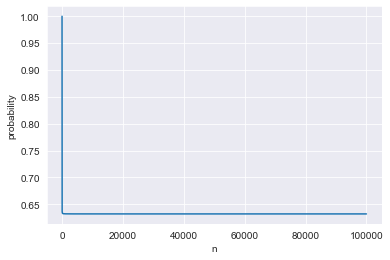

In [97]:
plt.figure()
plt.plot(n,p)
plt.xlabel('n')
plt.ylabel('probability')
plt.show()

In [98]:
list_j=[]
for i in range(10000):
    np.random.seed(i)
    order=np.random.randint(1,101,100)
    s=order.tolist()
    list_j.append(4 in s)
p_e=list_j.count(True)/10000
print(f'estimated probability is {p_e}')

estimated probability is 0.6265
